In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

Importing standard libraries for data analysis and reading the data.
All operations would be performed using the pandas dataframe object

In [2]:
df = pd.read_csv('Datasets/adultdata.csv')

In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'is_salary_above_50'],
      dtype='object')

In [4]:
df['native-country'].unique()
#Gets all the unique values in the native country column

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Gets all the columns which have the values ? in it. This pertains to NULL values in rows which have to be cleaned

In [5]:
len(df['education'].unique())

16

In [6]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [7]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [8]:
for i in df.columns:
    if ' ?' in df[i].unique() : 
        print(i)
        

workclass
occupation
native-country


/home/abhishek/pyenv/DS/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


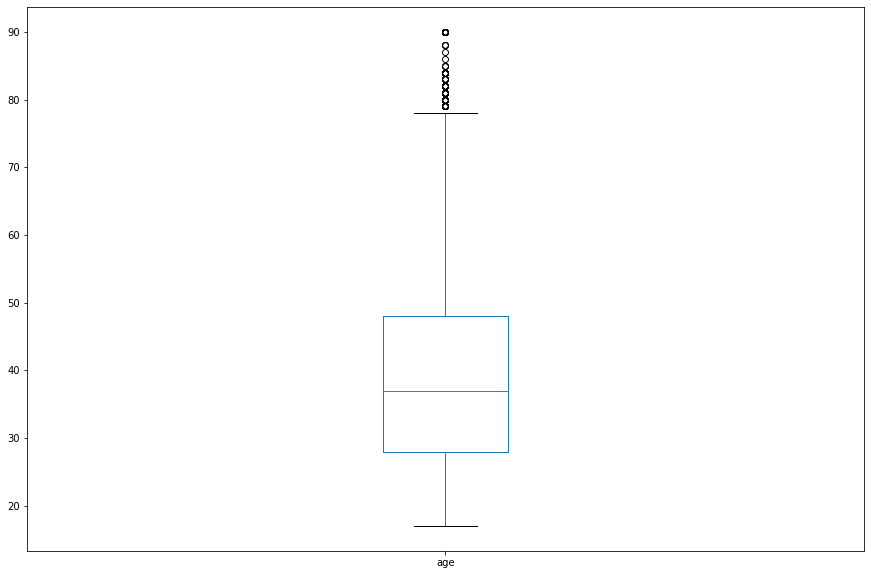

In [9]:
df['age'].plot.box(figsize = (15,10))

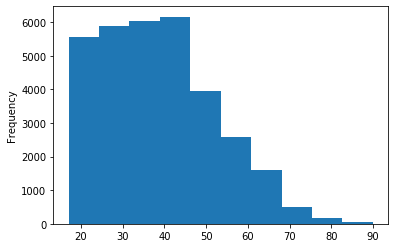

In [10]:
df['age'].plot(kind = 'hist')

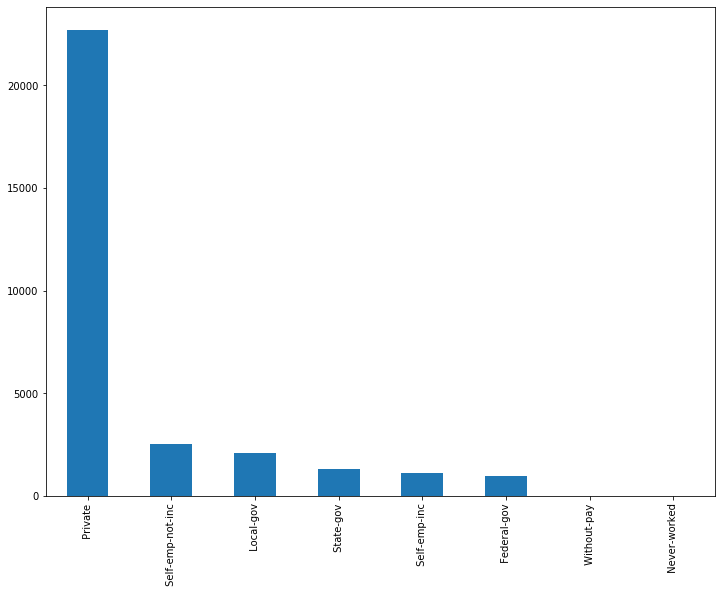

In [11]:
workclass_series = df['workclass'].value_counts(dropna = True)
workclass_series.pop(' ?')
workclass_series.plot(kind = 'bar',figsize = (12,9))


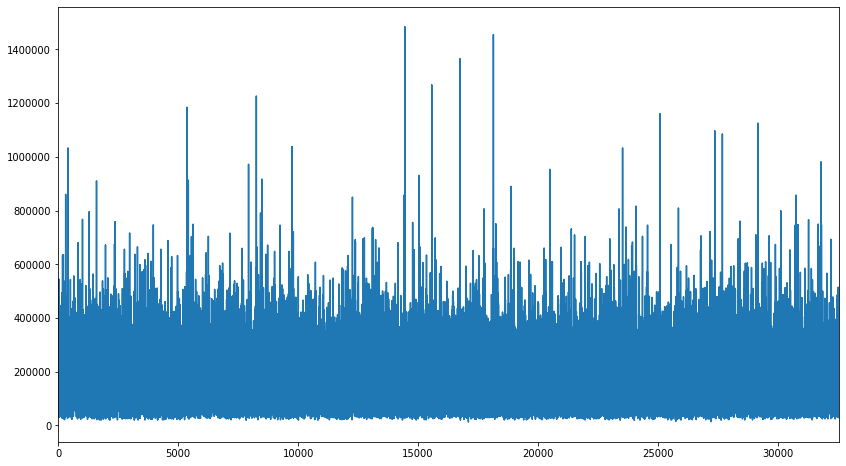

In [12]:
df['fnlwgt'].plot(figsize = (14,8))

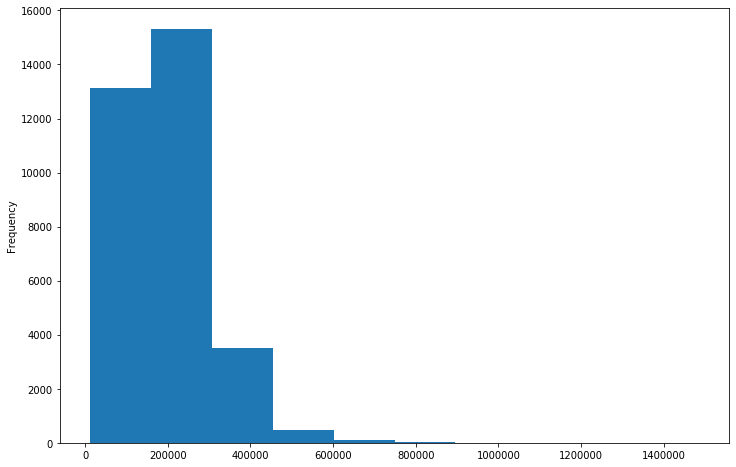

In [13]:
df['fnlwgt'].plot(kind = "hist",figsize = (12,8))

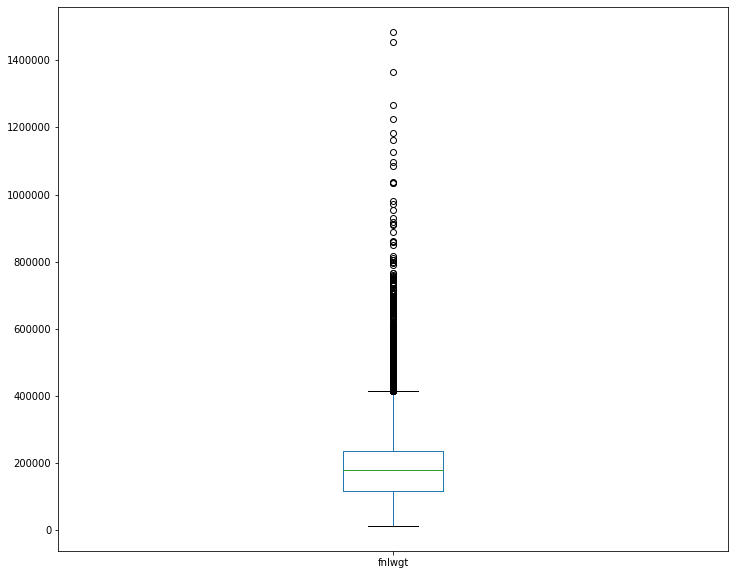

In [14]:
df['fnlwgt'].plot.box(figsize = (12,10))

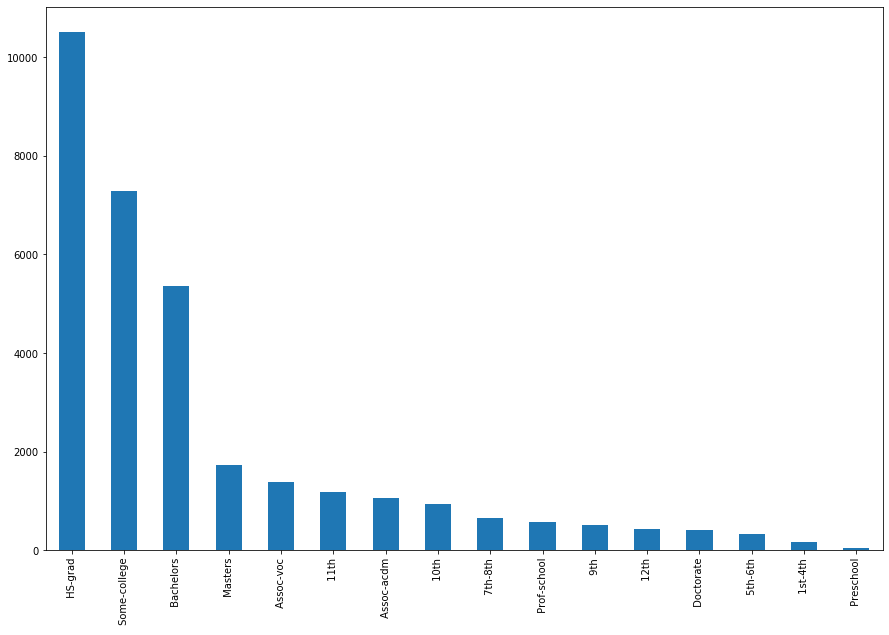

In [15]:
df['education'].value_counts().plot(kind = 'bar',figsize = (15,10))

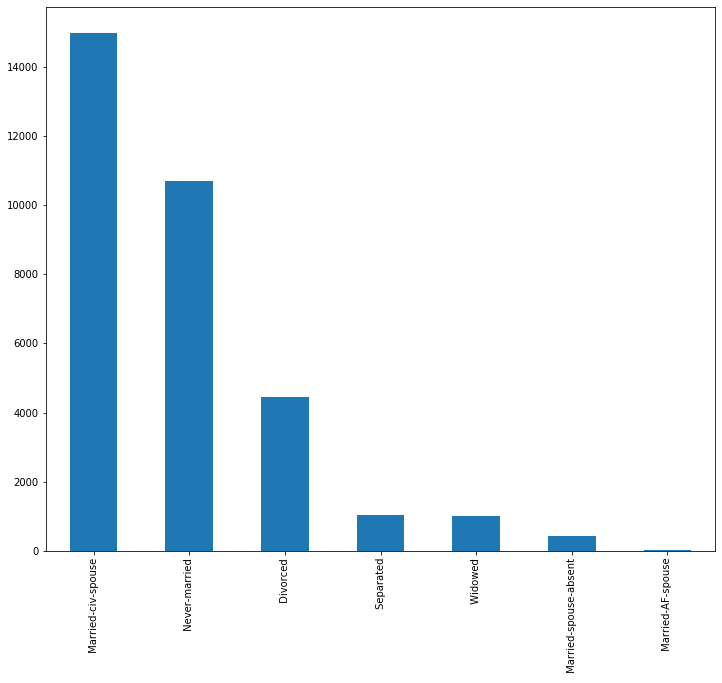

In [16]:
df['marital-status'].value_counts().plot(kind = 'bar',figsize = (12,10))

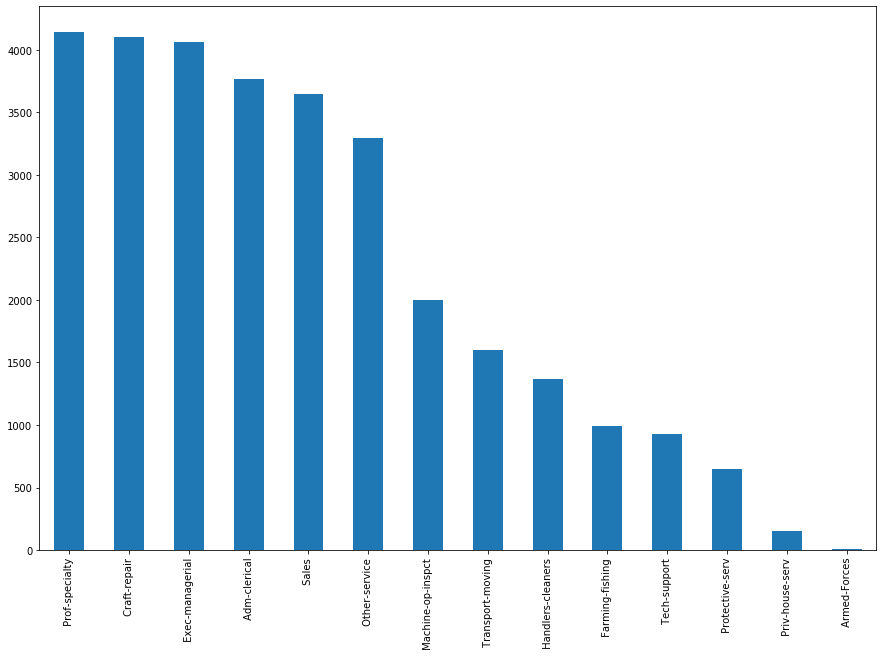

In [17]:
occupation_series = df['occupation'].value_counts(dropna = True)
occupation_series.pop(' ?')
occupation_series.plot(kind = 'bar',figsize = (15,10))

In [18]:
print(occupation_series)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


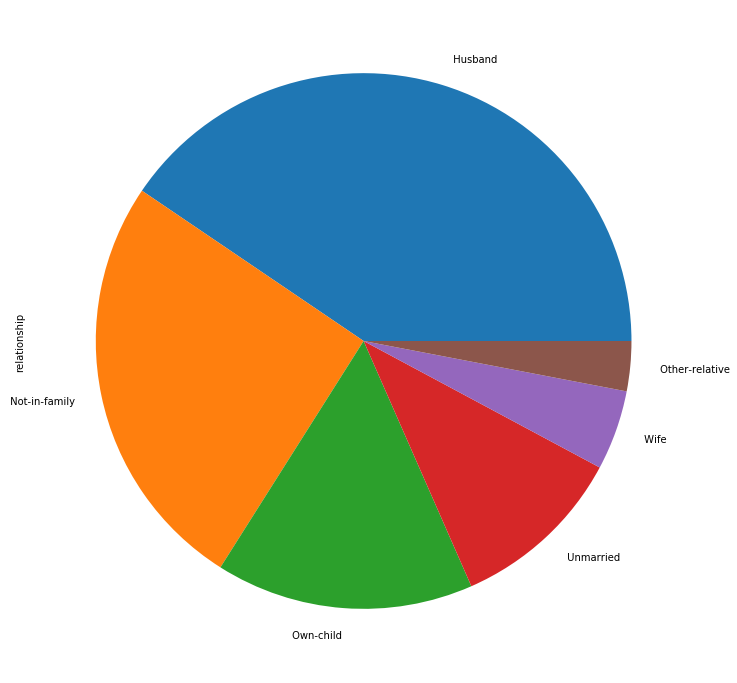

In [19]:
workclass_series = df['relationship'].value_counts(dropna = True)
workclass_series.plot(kind = 'pie',figsize = (12,19))

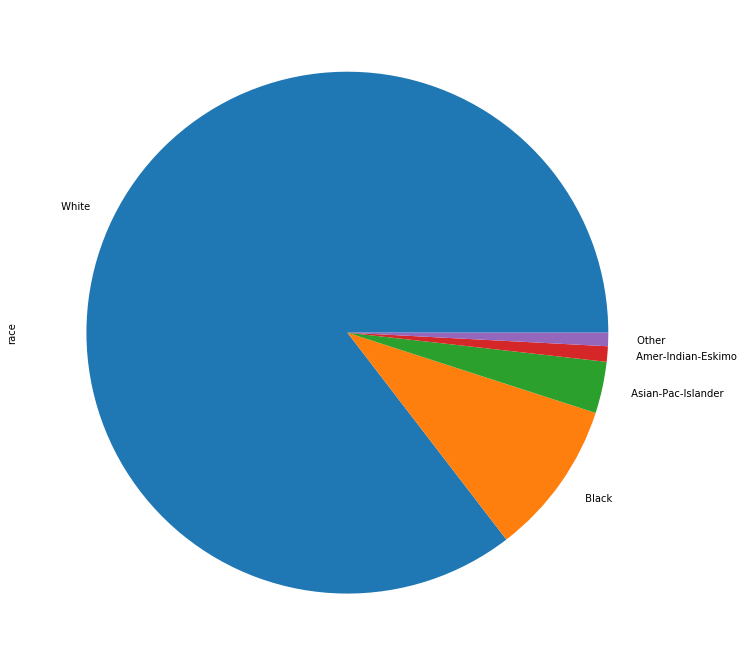

In [20]:
race_series = df['race'].value_counts().plot(kind = 'pie',figsize = (12,12) )

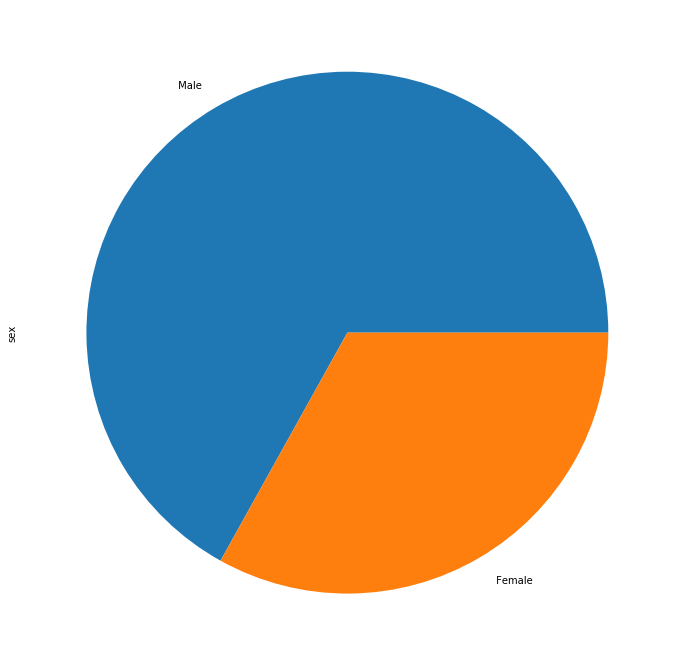

In [21]:
race_series = df['sex'].value_counts().plot(kind = 'pie',figsize = (12,12) )

In [22]:
print(df['capital-gain'].value_counts()[0])


29849


In [23]:
print(df['capital-loss'].value_counts()[0])


31042


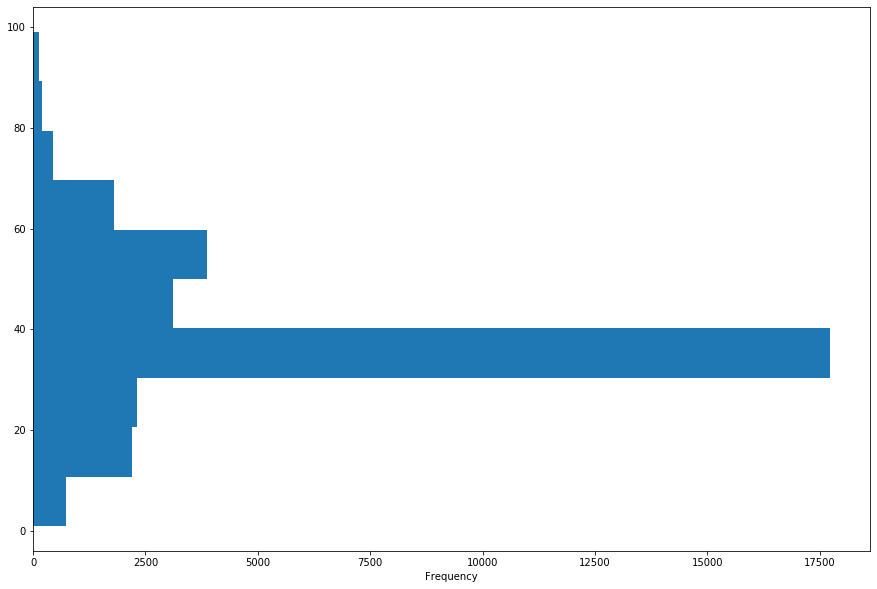

In [24]:
df['hours-per-week'].plot(kind = 'hist',orientation = 'horizontal',figsize = (15,10))

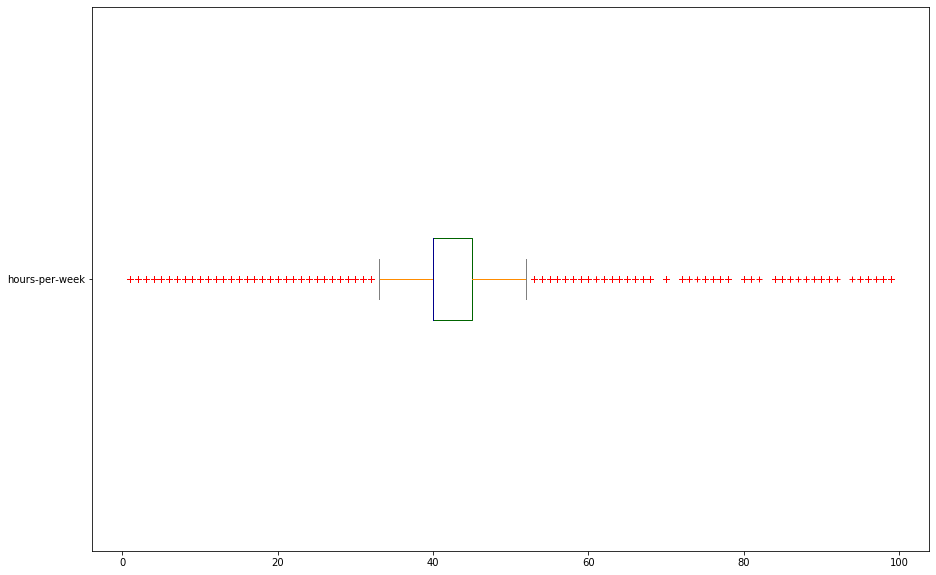

In [25]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}

df['hours-per-week'].plot.box(vert = False, figsize=(15,10) , color = color, sym = 'r+')

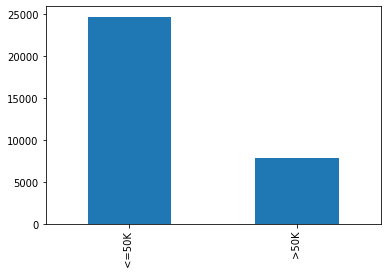

In [27]:
df['is_salary_above_50'].value_counts().plot(kind = 'bar')